In [ ]:
!pip install -q pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00


## Read and analyse the images in Dicom dataset

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os

In [ ]:
# Function to extract bone/lung windows
lung_window = [-600, 1600]
bone_window = [500, 2000]

def window_view(img, slope, intercept, center, width):
    img = img * slope + intercept
    img = np.clip(img, center - width // 2, center + width // 2)
    img = ((img - (center - width // 2)) / width)*255
    return img

In [ ]:
# Function for plotting
def plot_and_save(ds, filename):
    img = ds.pixel_array
    slope, intercept = ds.RescaleSlope, ds.RescaleIntercept
    bone_img = window_view(img, slope, intercept, *bone_window)
    lung_img = window_view(img, slope, intercept, *lung_window)

    fig = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original slice")
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Bone window")
    plt.imshow(bone_img, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Lung window")
    plt.imshow(lung_img, cmap='gray')

    plt.savefig(filename)


In [ ]:
import zipfile

# Extract the ZIP file
with zipfile.ZipFile('Dicom Images.zip', 'r') as zip_ref:
    zip_ref.extractall('Dataset')

# Now, you can use the extracted_folder as the dataset_path to read the DICOM files
dataset_path = "./Dataset/0003b3d648eb/d2b2960c2bbf"


In [ ]:
images=[]
for f in os.listdir(dataset_path):
  images.append(pydicom.dcmread(os.path.join(dataset_path, f)))
print(f"Before sorting: {images[0].InstanceNumber},{images[1].InstanceNumber}")
images.sort(key=lambda x: int(x.InstanceNumber))
print(f"After sorting: {images[0].InstanceNumber},{images[1].InstanceNumber}")

Before sorting: 4,92
After sorting: 1,2


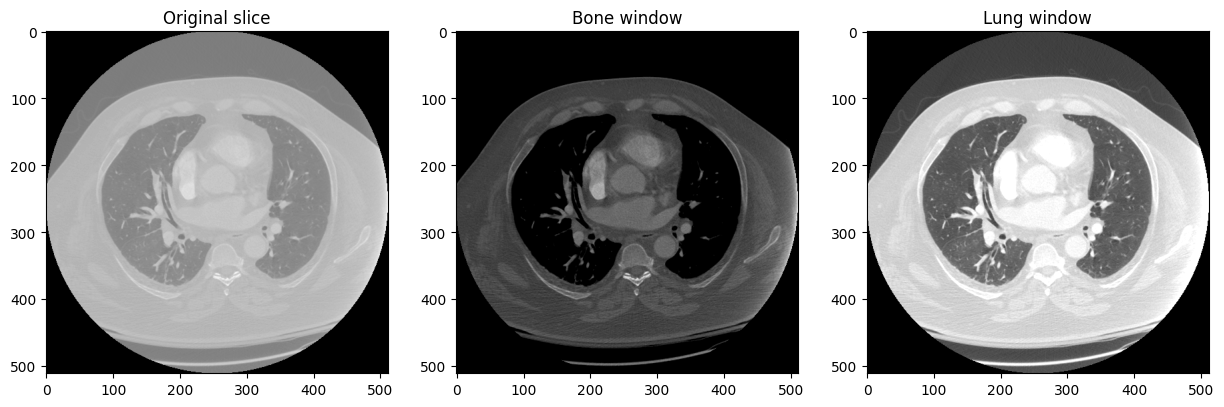

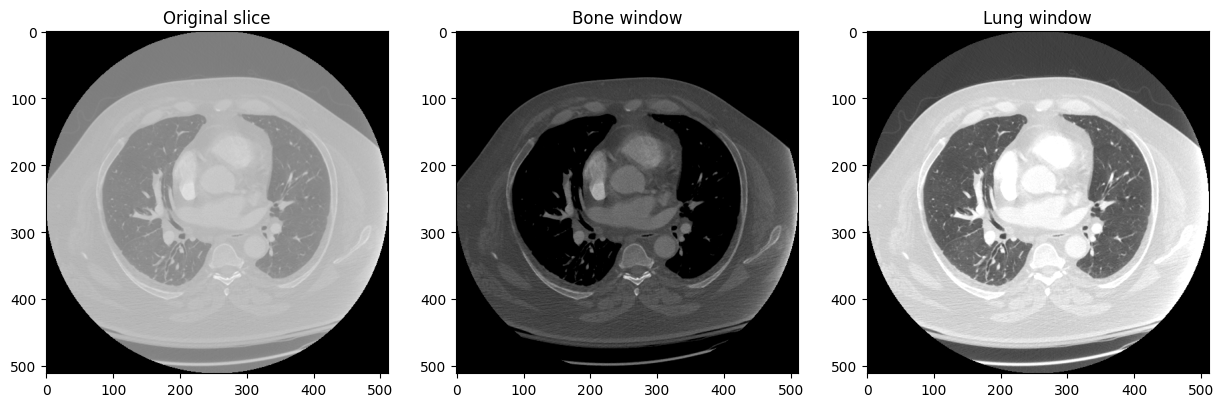

In [ ]:
image_111=images[111]
image_112=images[112]
plot_and_save(image_111, "111_result.jpg")
plot_and_save(image_112, "112_result.jpg")